In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv, glob, os

In [2]:
problem_name = 'benchmark'
report_directory = '../report_L_test'

In [3]:
files = glob.glob(os.path.join(report_directory, 'VARL_*_steps_9_' + problem_name + '_L_test_LSCHEME/060_' + problem_name +'*.csv'), recursive=True)

In [4]:
sorted_files = {}
sorted_iterations = {}

In [5]:
for file in files:
    L_value = int(file[file[:file.find('_steps_')].rfind('_')+1 : file.find('_steps_')]) * 1e-3
    print(file, str(L_value))

    sorted_files[L_value] = file

sorted_files = dict(sorted(sorted_files.items()))

../report_L_test/VARL_22_steps_9_benchmark_L_test_LSCHEME/060_benchmark_L_test_LSCHEME_richards_solver.csv 0.022
../report_L_test/VARL_23_steps_9_benchmark_L_test_LSCHEME/060_benchmark_L_test_LSCHEME_richards_solver.csv 0.023
../report_L_test/VARL_24_steps_9_benchmark_L_test_LSCHEME/060_benchmark_L_test_LSCHEME_richards_solver.csv 0.024
../report_L_test/VARL_25_steps_9_benchmark_L_test_LSCHEME/060_benchmark_L_test_LSCHEME_richards_solver.csv 0.025
../report_L_test/VARL_26_steps_9_benchmark_L_test_LSCHEME/060_benchmark_L_test_LSCHEME_richards_solver.csv 0.026000000000000002
../report_L_test/VARL_27_steps_9_benchmark_L_test_LSCHEME/060_benchmark_L_test_LSCHEME_richards_solver.csv 0.027
../report_L_test/VARL_28_steps_9_benchmark_L_test_LSCHEME/060_benchmark_L_test_LSCHEME_richards_solver.csv 0.028
../report_L_test/VARL_29_steps_9_benchmark_L_test_LSCHEME/060_benchmark_L_test_LSCHEME_richards_solver.csv 0.029
../report_L_test/VARL_30_steps_9_benchmark_L_test_LSCHEME/060_benchmark_L_test_LS

In [6]:
for L_value in sorted_files:

    with open(sorted_files[L_value], 'r') as csvfile:
        lines = csv.reader(csvfile, delimiter=',')
        sorted_iterations[L_value] = (sum(1 for row in lines))

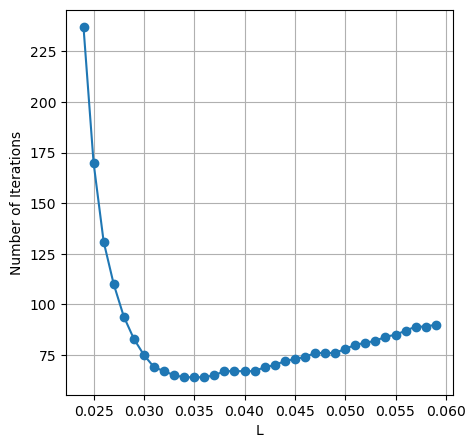

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

ax.plot( list(sorted_iterations.keys())[2:], [sorted_iterations[ll] for ll in list(sorted_iterations.keys())[2:]], 'o-' )

ax.grid()

ax.set_xlabel('L')
ax.set_ylabel('Number of Iterations')

plt.savefig('L_scheme_L_comparison.eps', format='eps')